In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from([1, 2, 3])
G.nodes

NodeView((1, 2, 3))

In [4]:
len(G.nodes)

3

In [5]:
G.add_edge(1, 2)
G.edges

EdgeView([(1, 2)])

In [6]:
G.node[1]['label'] = 'blue'
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

C:\Users\mattc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


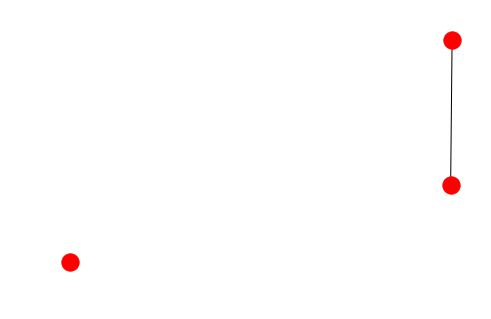

In [7]:
nx.draw(G)
plt.show()

In [8]:
with open('twitter_combined.txt') as f:
    mylist = [tuple(map(int, i.split(' '))) for i in f]

In [9]:
print("Number of tuples = " + str(len(mylist)))
print("Number of distinct tuples = " + str(len(set(mylist))))
print("Number of duplicate tuples = " + str(len(mylist) - len(set(mylist))))

Number of tuples = 2420766
Number of distinct tuples = 1768149
Number of duplicate tuples = 652617


In [10]:
a, b = zip(*mylist)
print("Number of origin nodes = " + str(len(set(a))))
print("Number of destination nodes = " + str(len(set(b))))
print("Number of nodes = " + str(len(set(a).union(set(b)))))

Number of origin nodes = 70097
Number of destination nodes = 81305
Number of nodes = 81306


In [11]:
T = nx.DiGraph()
T.add_edges_from(mylist)

In [12]:
len(T.nodes)

81306

In [13]:
len(T.edges())

1768149

In [14]:
T = nx.DiGraph()
subList = [(a, b) for a, b in mylist if a < 1000 and b < 1000]
T.add_edges_from(subList)
print("Number of nodes = " + str(len(T.nodes())))
print("Number of edges = " + str(len(T.edges())))

Number of nodes = 34
Number of edges = 149


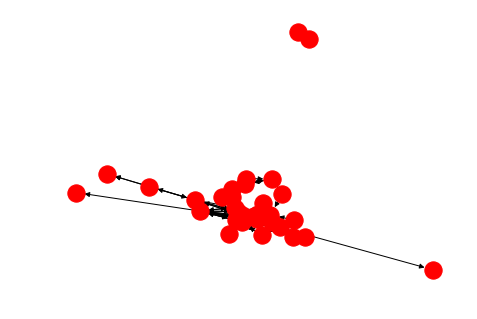

In [15]:
nx.draw(T)
plt.show()

In [16]:
# Add random jobs to nodes
import random
jobs = ['Doctor', 'Nurse', 'Teacher', 'Tinker', 'Tailor', 'Soldier', 'Spy']
for n in T.nodes():
    T.node[n]['job'] = random.choice(jobs)

# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['job'] == 'Spy']
noi

[14, 785, 648, 746]

In [17]:
# Add random dates to edges
from datetime import date
years = list(range(2000, 2019))
months = list(range(1, 13))
days = list(range(1, 29))
for n1, n2 in T.edges():
    T[n1][n2]['date'] = date(random.choice(years), random.choice(months), random.choice(days))

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
eoi

[(47, 380),
 (47, 14),
 (47, 528),
 (380, 14),
 (380, 586),
 (14, 380),
 (528, 47),
 (528, 939),
 (586, 12),
 (586, 785),
 (586, 13),
 (586, 767),
 (586, 291),
 (586, 20),
 (586, 418),
 (586, 422),
 (586, 414),
 (761, 528),
 (761, 380),
 (20, 989),
 (20, 66),
 (20, 648),
 (20, 767),
 (20, 418),
 (20, 997),
 (20, 414),
 (20, 746),
 (989, 418),
 (989, 12),
 (989, 13),
 (989, 291),
 (989, 885),
 (418, 922),
 (418, 573),
 (418, 989),
 (418, 648),
 (418, 295),
 (418, 422),
 (418, 291),
 (573, 418),
 (12, 14),
 (12, 648),
 (12, 291),
 (409, 14),
 (13, 107),
 (13, 20),
 (13, 12),
 (13, 989),
 (13, 291),
 (422, 586),
 (422, 885),
 (422, 295),
 (422, 418),
 (785, 291),
 (785, 422),
 (785, 12),
 (785, 20),
 (648, 20),
 (648, 12),
 (648, 418),
 (295, 418),
 (295, 324),
 (291, 13),
 (291, 418),
 (291, 586),
 (885, 20),
 (885, 418),
 (885, 291),
 (885, 586),
 (885, 13),
 (885, 295),
 (885, 12),
 (767, 586),
 (767, 20),
 (767, 765),
 (246, 20),
 (997, 20),
 (414, 586),
 (414, 20),
 (939, 414),
 (939

In [18]:
# Add random weights to edges
for n1, n2 in T.edges():
    T[n1][n2]['weight'] = random.uniform(0, 1)

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 20 is involved
    if 20 in [u, v]:
    
        # Set the weight to 0.9
        T[u][v]['weight'] = 0.9

[(u, v, d) for u, v, d in T.edges(data=True) if d['weight'] == 0.9]

[(586, 20, {'date': datetime.date(2004, 3, 9), 'weight': 0.9}),
 (20, 989, {'date': datetime.date(2005, 2, 16), 'weight': 0.9}),
 (20, 66, {'date': datetime.date(2006, 5, 2), 'weight': 0.9}),
 (20, 107, {'date': datetime.date(2010, 8, 28), 'weight': 0.9}),
 (20, 13, {'date': datetime.date(2015, 6, 23), 'weight': 0.9}),
 (20, 295, {'date': datetime.date(2011, 9, 21), 'weight': 0.9}),
 (20, 648, {'date': datetime.date(2001, 1, 10), 'weight': 0.9}),
 (20, 885, {'date': datetime.date(2014, 1, 5), 'weight': 0.9}),
 (20, 422, {'date': datetime.date(2010, 8, 22), 'weight': 0.9}),
 (20, 767, {'date': datetime.date(2003, 9, 6), 'weight': 0.9}),
 (20, 418, {'date': datetime.date(2005, 10, 7), 'weight': 0.9}),
 (20, 291, {'date': datetime.date(2015, 2, 10), 'weight': 0.9}),
 (20, 586, {'date': datetime.date(2015, 9, 17), 'weight': 0.9}),
 (20, 997, {'date': datetime.date(2002, 4, 26), 'weight': 0.9}),
 (20, 414, {'date': datetime.date(2003, 6, 17), 'weight': 0.9}),
 (20, 746, {'date': datetime.da

In [19]:
T.number_of_selfloops()

0

In [20]:
# Add some self loops to T
for n in T.nodes():
    if random.uniform(0, 1) < .2:
        T.add_edge(n, n)
        T[n][n]['date'] = date(random.choice(years), random.choice(months), random.choice(days))
        T[n][n]['weight'] = random.uniform(0, 1)

In [21]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u == v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

print("Number of self loops = " + str(T.number_of_selfloops()))

[(u, v, d) for u, v, d in T.edges(data=True) if u == v]

Number of self loops = 5


[(989,
  989,
  {'date': datetime.date(2009, 2, 16), 'weight': 0.6115925325972892}),
 (12, 12, {'date': datetime.date(2017, 4, 4), 'weight': 0.819105867459388}),
 (409, 409, {'date': datetime.date(2007, 1, 2), 'weight': 0.9611317783602139}),
 (648,
  648,
  {'date': datetime.date(2003, 2, 19), 'weight': 0.3960888569715427}),
 (767,
  767,
  {'date': datetime.date(2008, 5, 25), 'weight': 0.8086222131209969})]

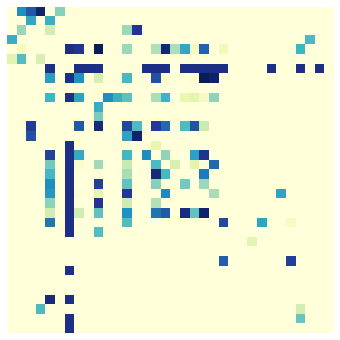

In [22]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `job` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'job' not in d.keys()

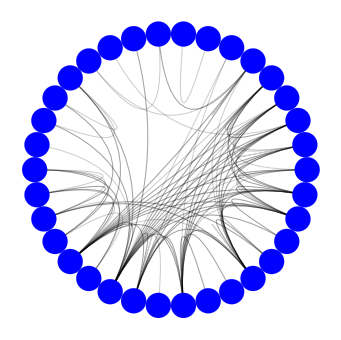

In [23]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

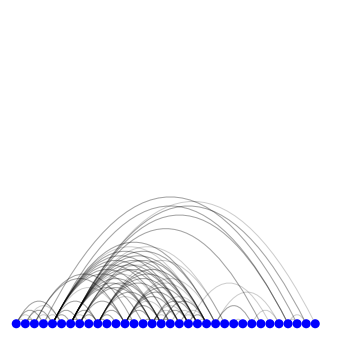

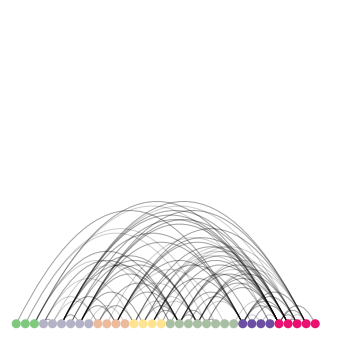

In [24]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='job', node_color='job')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
